In [ ]:
# Predictive Modeling for Stock Analysis
# Objective: Use machine learning models to predict stock prices and evaluate model performance.
# Models used: Linear Regression and Random Forest Regressor
# Evaluation Metrics: Mean Absolute Error (MAE), R-squared (R²)
# Data: Apple Inc. (AAPL) stock data



In [2]:
# Import dependencies 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [31]:
# Load the dataset
data = pd.read_csv('data/AAPL_data_with_beta.csv')

# Display the first few rows to confirm that the data is loaded correctly
print(data.head())

# Inspect unique values in the 'Close' column to identify potential issues
print("Unique values in 'Close':")
print(data['Close'].unique())

# Convert the 'Close' column to numeric, coercing errors to handle non-numeric entries
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Drop rows with missing values in 'Close' to ensure data consistency
data.dropna(subset=['Close'], inplace=True)





         Date          Adj Close              Close               High  \
0         NaN               AAPL               AAPL               AAPL   
1  2020-01-02   72.7960205078125   75.0875015258789   75.1500015258789   
2  2020-01-03   72.0882797241211  74.35749816894531   75.1449966430664   
3  2020-01-06  72.66270446777344  74.94999694824219  74.98999786376953   
4  2020-01-07  72.32097625732422  74.59750366210938   75.2249984741211   

                 Low               Open     Volume  Stock Return  Rolling Beta  
0               AAPL               AAPL       AAPL           NaN           NaN  
1  73.79750061035156  74.05999755859375  135480400           NaN           NaN  
2             74.125   74.2874984741211  146322800     -0.009722           NaN  
3            73.1875  73.44750213623047  118387200      0.007968           NaN  
4  74.37000274658203  74.95999908447266  108872000     -0.004703           NaN  
Unique values in 'Close':
['AAPL' '75.0875015258789' '74.357498168945

In [33]:
# Calculate key technical indicators for feature engineering

# 50-day and 200-day Simple Moving Averages (SMA)
# SMA provides trend-following signals and helps smooth price data
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Bollinger Bands to measure price volatility
# Upper Band: Rolling Mean + 2 * Rolling Std
# Lower Band: Rolling Mean - 2 * Rolling Std
data['Rolling Mean'] = data['Close'].rolling(window=20).mean()
data['Rolling Std'] = data['Close'].rolling(window=20).std()
data['Upper Band'] = data['Rolling Mean'] + (2 * data['Rolling Std'])
data['Lower Band'] = data['Rolling Mean'] - (2 * data['Rolling Std'])

# Relative Strength Index (RSI) to measure momentum
# RSI values help identify overbought (RSI > 70) or oversold (RSI < 30) conditions
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Drop rows with missing values in calculated indicators
data.dropna(subset=['SMA_50', 'SMA_200', 'Rolling Mean', 'RSI'], inplace=True)
print(data.head())

           Date           Adj Close       Close                High  \
399  2021-08-02  142.75216674804688  145.520004   146.9499969482422   
400  2021-08-03   144.5571746826172  147.360001   148.0399932861328   
401  2021-08-04  144.15493774414062  146.949997   147.7899932861328   
402  2021-08-05  144.26290893554688  147.059998  147.83999633789062   
403  2021-08-06   143.5751495361328  146.139999  147.11000061035156   

                    Low                Open    Volume  Stock Return  \
399              145.25  146.36000061035156  62880000     -0.002331   
400  145.17999267578125  145.80999755859375  64786600      0.012644   
401  146.27999877929688  147.27000427246094  56368300     -0.002782   
402   146.1699981689453  146.97999572753906  46397700      0.000749   
403   145.6300048828125  146.35000610351562  54126800     -0.006256   

     Rolling Beta    SMA_50    SMA_200  Rolling Mean  Rolling Std  Upper Band  \
399      1.238618  136.1742  128.55475    145.811000     1.990989

In [34]:
# Define the features (input variables) and the target (output variable)
# Features include RSI, SMA, and Bollinger Bands
# Target is the stock's closing price
required_features = ['RSI', 'SMA_50', 'SMA_200', 'Rolling Mean', 'Rolling Std', 'Rolling Beta']
target = 'Close'

# Check for missing features in the dataset
missing_features = [feature for feature in required_features if feature not in data.columns]
if missing_features:
    raise KeyError(f"The following features are missing from the dataset: {missing_features}")

# Create feature matrix (X) and target vector (y)
X = data[required_features]
y = data[target]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data successfully split into training and testing sets.")


Data successfully split into training and testing sets.


In [44]:
# Investigate overfitting by comparing training and testing performance

# Evaluate model performance on the training set
# This helps identify if the model is overfitting to the training data
y_train_pred_rf = rf_model.predict(X_train)
print("Training R-squared:", r2_score(y_train, y_train_pred_rf))  # High value here indicates good fit to training data
print("Training MAE:", mean_absolute_error(y_train, y_train_pred_rf))  # Lower value indicates less error on training data

# Compare training performance with test results
# Significant difference between training and test metrics could indicate overfitting
print("Testing R-squared:", r2_score(y_test, y_pred_rf))  # High value here indicates good generalization
print("Testing MAE:", mean_absolute_error(y_test, y_pred_rf))  # Lower value indicates better performance on unseen data


Training R-squared: 0.9977576474637941
Training MAE: 0.6310111478326742
Testing R-squared: 0.9800777071942185
Testing MAE: 1.7431596712206234


Linear Regression Results:
Mean Absolute Error (MAE): 1.9942191859142588
R-squared (R²): 0.9743790033779999


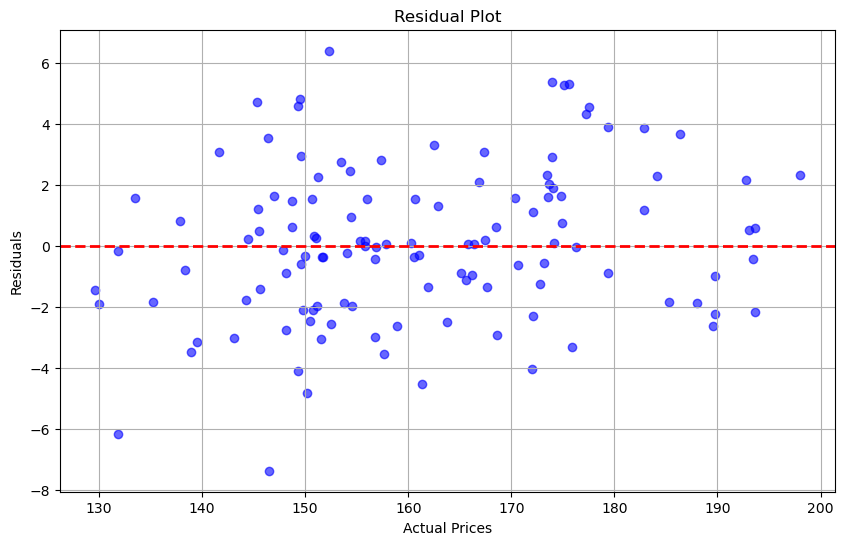

In [35]:
# Train a Linear Regression model
# Linear Regression establishes a linear relationship between features and target
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict the stock prices on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model performance using MAE and R-squared
print("Linear Regression Results:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_lr))
print("R-squared (R²):", r2_score(y_test, y_pred_lr))

# Plot the residuals (errors) to evaluate the model's fit
# Residuals = Actual - Predicted
residuals = y_test - y_pred_lr
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6, color="blue")
plt.axhline(0, color="red", linestyle="--", lw=2)
plt.title("Residual Plot")
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()



Random Forest Results:
Mean Absolute Error (MAE): 1.7431596712206234
R-squared (R²): 0.9800777071942185


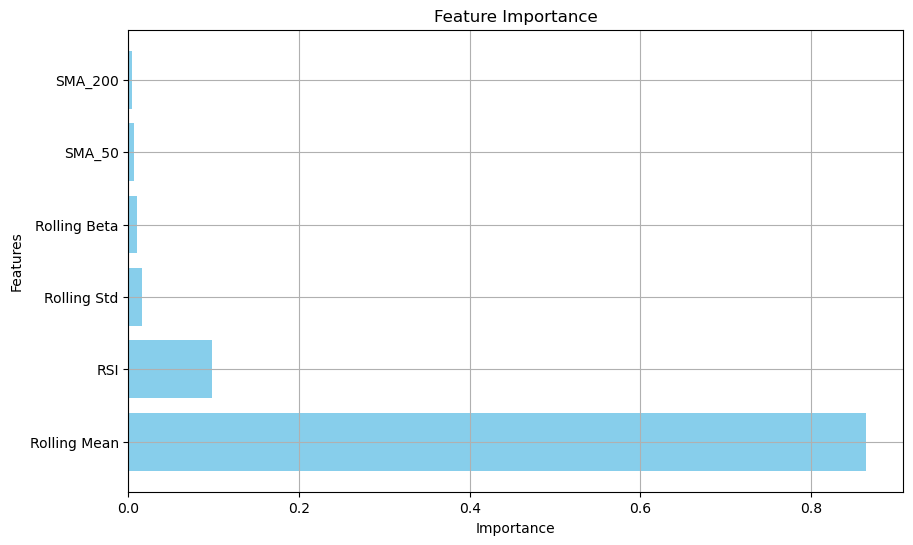

In [39]:
# Train a Random Forest Regressor model
# Random Forest is an ensemble model that uses decision trees to improve accuracy and reduce overfitting
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict the stock prices on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model performance using MAE and R-squared
print("\nRandom Forest Results:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_rf))
print("R-squared (R²):", r2_score(y_test, y_pred_rf))

# Visualize the feature importance from the Random Forest model
importance = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': required_features, 'Importance': importance})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.grid(True)
plt.show()





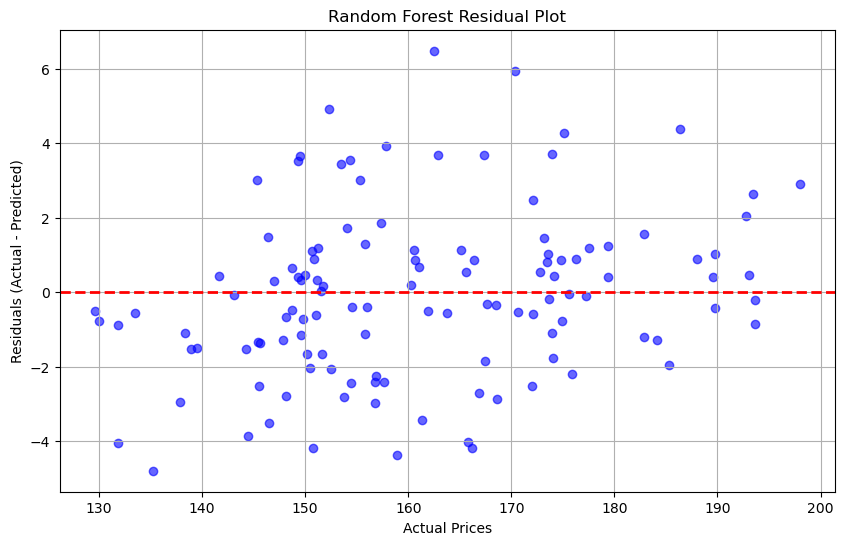

In [40]:
# Calculate residuals
residuals_rf = y_test - y_pred_rf

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_rf, alpha=0.6, color="blue")
plt.axhline(0, color="red", linestyle="--", lw=2)
plt.title("Random Forest Residual Plot")
plt.xlabel("Actual Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()



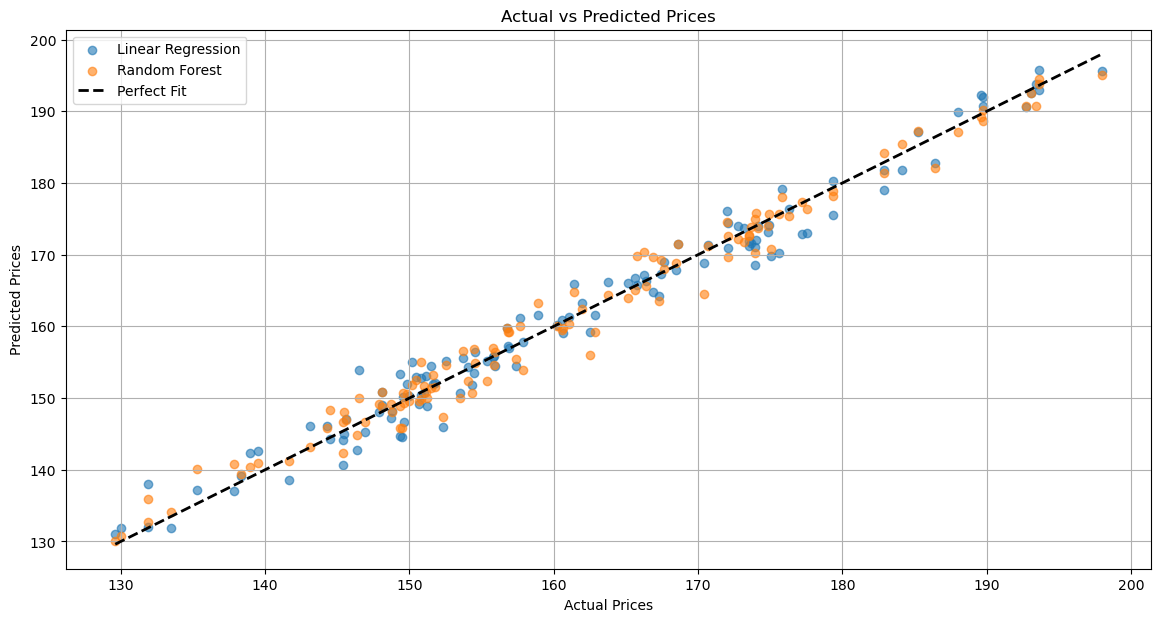

In [41]:
# Compare the Actual vs Predicted stock prices for both models
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.6)
plt.scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Fit")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()

In [42]:
# Suggestions for future improvements:
# - Implement advanced time-series forecasting models like Long Short-Term Memory (LSTM)
# - Perform hyperparameter tuning for the Random Forest model to improve performance
# - Explore additional features and technical indicators to enhance model accuracy
# - Use additional evaluation metrics such as RMSE and MAPE for a comprehensive analysis
